# Cutoff for the solar atmosphere using the VALIIIc Model

##Background - the problem



	

Compute the atmospheric cut-off frequenccy (From Roberts 2004)

$$ \omega_{c}=\frac{\gamma g}{4\pi c_{s}}\sqrt{1+2\frac{d}{dz}\frac{P}{\rho g}}$$

The atmospheric scale parameter 

Read VAL IIc data from csv file

column 1 height [m]
Column 2 Temperature [K]
Column 3 Density [kg/m^3]
Column 4 Pressure [Pa]


(2048L, 4L)
[ 6.20960377  6.20920411  6.20880509 ...,  3.76641285  3.76641285
  3.76641285]


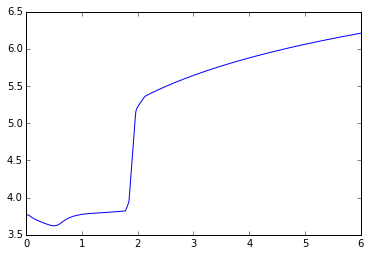

In [2]:
import numpy
import matplotlib.pyplot as plt
import math



%matplotlib inline 
data=numpy.loadtxt(fname='..\\data\\atmos.csv', delimiter=',')
#print data
print data.shape
#print data[1:10,2]
height=data[0:2048,0]
ltemp=numpy.log10(data[0:2048,1]) #notation to avoid http://stackoverflow.com/questions/21687581/typeerror-only-length-1-arrays-can-be-converted-to-python-scalars-while-trying

print ltemp
plt.plot(height/1.0e6,ltemp)

## Function to compute the speed of sound

8192
2048
2048


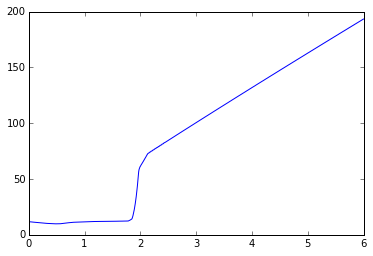

In [3]:
from math import exp, sqrt, pi

class vars:
  
    mu=0.6e0
    R=8.31e3
    fgamma=1.66666667e0
    ggg=-274.0e0
    mu=4*pi/1.0e7
    

def cs(var, p, rho):
    vcs=sqrt(vars.fgamma*p/rho)
    return vcs

ptemp=numpy.float64(data[1:2048,3])
rhotemp=numpy.float64(data[1:2048,2])

asize=data.size
print asize
acs = numpy.zeros(asize/4)
for i in range(0,(asize/4)-1):
    acs[i]=cs(vars,ptemp[i],rhotemp[i]);
    
print acs.size
print height.size
plt.plot(height/1.0e6,acs/1000)

##Functions to compute sound speed analog and gradient from best fits


$$ \frac{d}{dz}\frac{P}{\rho g}$$

In [1]:
from math import exp, sqrt, pi

def p_over_rhog(vars, h):
    poverrhog=0
    
    #region 1
    if h>=2.0419e6 and h<=6e6:
        poverrhog=177.4+1.349e-5*h^(1.886)
    #region2
    elif h>=1.802e6 and h<=2.039e6:
        p1=-4.415e-34
        p2=6.797e-27
        p3=-4.576e-20
        p4=1.76e-13
        p5=-4.228e-7
        p6=0.65
        p7=-6.243e5
        p8=3.426e11
        p9=-8.22e16
        poverrhog=p1*h^8+p2*h^7+p3*h^6+p4*h^5+p5^h^4+p6*h^3+p7*h^2+p8*h+p9                
    #region3
    elif h>=8.7e3 and h<1.7991e6:
        p1=1.37e-42
        p2=-9.683e-36
        p3=2.732e-29
        p4=-3.894e-23
        p5=2.904e-17
        p6=-1.067e-11
        p7=1.973e-6
        p8=-0.4078
        p9=3.051e5
        poverrhog=p1*h^8+p2*h^7+p3*h^6+p4*h^5+p5*h^4+p6*h^3+p7*h^2+p8*h+p9            
                
    return poverrhog


#compute derivative
def dp_over_rhog(vars, h):
    dpoverrhog=0
    
     #region 1
    if h>=2.0419e6 and h<=6e6:
        dpoverrhog=2.544214e-5*h^(0.886)
    #region2
    elif h>=1.802e6 and h<=2.039e6:
        p1=-4.415e-34
        p2=6.797e-27
        p3=-4.576e-20
        p4=1.76e-13
        p5=-4.228e-7
        p6=0.65
        p7=-6.243e5
        p8=3.426e11
        p9=-8.22e16
        dpoverrhog=8*p1*h^7+7*p2*h^6+6*p3*h^5+5*p4*h^4+4*p5*h^3+3*p6*h^2+2*p7*h+p8                
    #region3
    elif h>=8.7e3 and h<1.7991e6:
        p1=1.37e-42
        p2=-9.683e-36
        p3=2.732e-29
        p4=-3.894e-23
        p5=2.904e-17
        p6=-1.067e-11
        p7=1.973e-6
        p8=-0.4078
        p9=3.051e5        
        dpoverrhog=8*p1*h^7+7*p2*h^6+6*p3*h^5+5*p4*h^4+4*p5*h^3+3*p6*h^2+2*p7*h+p8                         
    return dpoverrhog

## Function to compute the atmospheric scale parameter

2925.4 0.12276266 5.49e-12 2378.09449297
2925.4 0.12268955 5.49e-12 12.3680623967
2925.4 0.12261645 5.49e-12 16.6103776316
2925.4 0.12254336 5.49e-12 16.6081051947
2925.4 0.12247028 5.49e-12 12.3939177614
2925.4 0.12239721 5.49e-12 46.0892914444
2925.4 0.12232414 5.5e-12 46.0707356198
2925.4 0.12225108 5.5e-12 12.3568622345
2925.4 0.12217803 5.5e-12 16.5686463936
2925.4 0.12210499 5.5e-12 12.3839810883
2925.4 0.12203195 5.5e-12 45.8553024014
2925.4 0.12195893 5.51e-12 45.8353096169
2925.4 0.12188591 5.51e-12 12.3455581525
2925.4 0.1218129 5.51e-12 16.5310289599
2925.4 0.12173989 5.51e-12 16.528576089
2925.4 0.1216669 5.51e-12 12.3723446422
2925.4 0.12159391 5.51e-12 45.6043127502
2925.4 0.12152093 5.52e-12 45.5842115828
2925.4 0.12144796 5.52e-12 12.3358149138
2925.5 0.12137499 5.52e-12 16.4887707924
2925.4 0.12130204 5.52e-12 12.3599895904
2925.4 0.12122909 5.52e-12 45.3726832017
2925.4 0.12115615 5.53e-12 45.3537412939
2925.4 0.12108322 5.53e-12 12.3246838344
2925.4 0.12101029 5.53e-

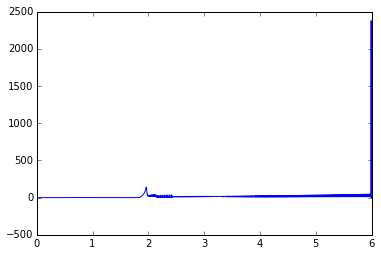

In [14]:
from math import exp, sqrt, pi





def lambda0(vars, P,rho):
    vlam0=P/(rho*vars.ggg)
    return vlam0

def lagrange_interp(xval,f,x,i): 
    t1=(xval-x[i])*(xval-x[i+1])/((x[i-1]-x[i])*(x[i-1]-x[i+1]))
    t2=(xval-x[i-1])*(xval-x[i+1])/((x[i]-x[i-1])*(x[i]-x[i+1]))
    t3=(xval-x[i-1])*(xval-x[i])/((x[i+1]-x[i-1])*(x[i+1]-x[i]))
    y=t1*f[i-1]+t2*f[i]+t3*f[i+1]
    return y

def diff5p(y,i,h):
    diff=(y[i-2]-8*y[i-1]+8*y[i+1]-y[i+2])/(12*h)
    return diff

def diff3p(y,i,h):
    diff=(y[i+1]-y[i-1])/(2*h)    
    return diff

#compute lambda0
alam0 = numpy.zeros(asize/4)
alami0 = numpy.zeros(asize/4)

for i in range(0,(asize/4)-1):
    alam0[i]=lambda0(vars,ptemp[i],rhotemp[i])

dh=height[0]-height[1]    
for i in range(1,(asize/4)-2):
    xval=height[0]-i*dh
    alami0[i]=lagrange_interp(xval,alam0,height,i)    
    
    
#print alam0  
#compute cutoff
atc0 = numpy.zeros(asize/4)
lamdash0 = numpy.zeros(asize/4)
for i in range(2,(asize/4)-4):
    h=height[i]-height[i+1]
    #lamdash0[i]=diff3p(alam0,i,h)
    #lamdash0[i]=ptemp[i]/rhotemp[i]
    lamdash0[i]=diff5p(alami0,i,h)
    #print h,alam0[i],lamdash0[i]
    print h,ptemp[i],rhotemp[i],lamdash0[i]
    atc0[i]=1.0/((vars.fgamma*vars.ggg/(4*pi*acs[i]))*math.sqrt(1+2*lamdash0[i]))
    #atc0[i]=1.0/((vars.fgamma*vars.ggg/(4*pi*acs[i])))
    #atc0[i]=math.sqrt(1+2*lamdash0[i])
    
#print atc0
plt.plot(height/1.0e6,lamdash0)


##References
Malins
Direct Propagation of Photospheric Acoustic p Modes into Nonmagnetic Solar Atmosphere
http://adsabs.harvard.edu/abs/2007SoPh..246...41M

Fleck, B.; Schmitz, F.
The 3-min oscillations of the solar chromosphere - A basic physical effect?
http://adsabs.harvard.edu/abs/1991A%26A...250..235F

Vernazza, J. E.; Avrett, E. H.; Loeser, R.
Structure of the solar chromosphere. III - Models of the EUV brightness components of the quiet-sun
http://adsabs.harvard.edu/abs/1981ApJS...45..635V

Roberts, B.
MHD Waves in the Solar Atmosphere
http://adsabs.harvard.edu/abs/2004ESASP.547....1R